In [1]:
import rebound
import sys
#change the next line to reflect where you have downloaded the source code
sys.path.insert(0, '/Users/kvolk/Documents/GitHub/SBDynT/src')
import sbdynt as sbd

In [2]:
#Set up and run a simulation with clones of a chaotic TNO for this example
sim= rebound.Simulation()
sbody = 'K00F53X'
savefile = "K00F53X-archive.bin"
nclones = 10
tmax = 5e6
tout = 1e3

In [3]:
iflag, epoch, sim = sbd.initialize_simulation(planets=['Jupiter','Saturn','Uranus','Neptune'],
                                                 des=sbody, clones=nclones)
if(iflag):
    rflag, sim = sbd.run_simulation(sim, tmax=tmax, tout=tout,filename=savefile,deletefile=False)

In [6]:
#now reading all the clones (the best fit will be indexed 0, then clones)
(flag, a, e, inc, node, aperi, ma, phi, t,res_str) = sbd.read_sa_for_resonance(
                            sbody=sbody,
                            archivefile=savefile,planet='neptune',
                            p=7,q=4,nclones=nclones)

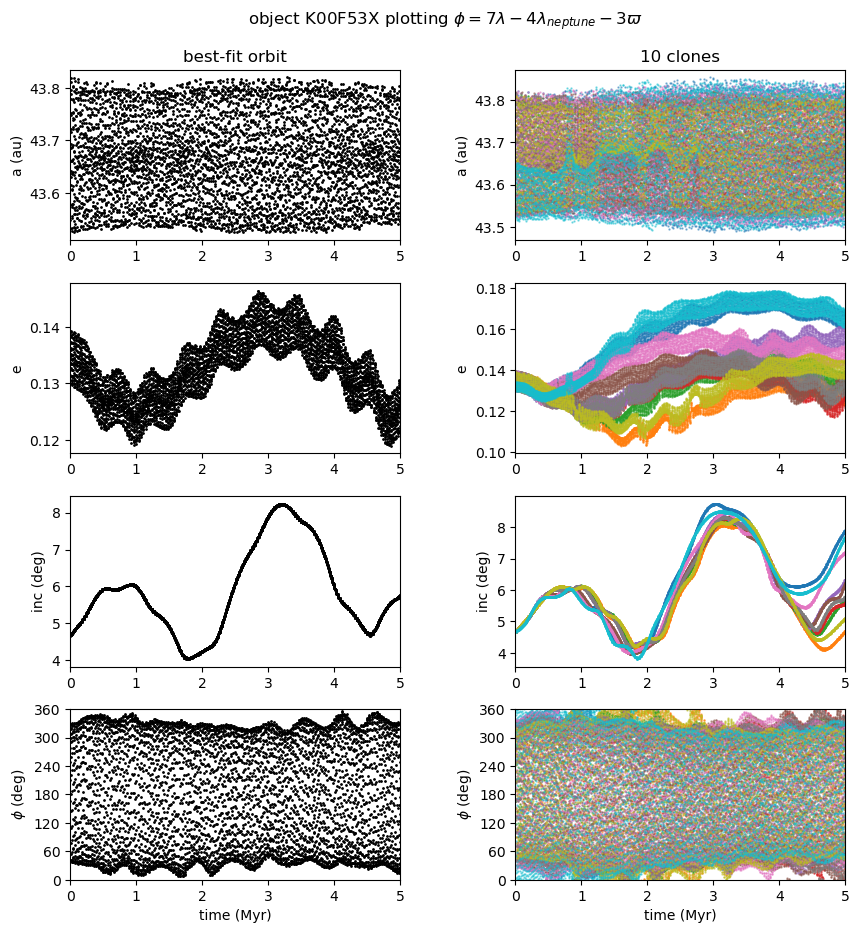

In [7]:
#default plotting function call
flag = sbd.plot_resonance(sbody=sbody,
                          res_string=res_str,
                          a=a,e=e,inc=inc,phi=phi,t=t,
                          nclones=nclones,figfile=None)

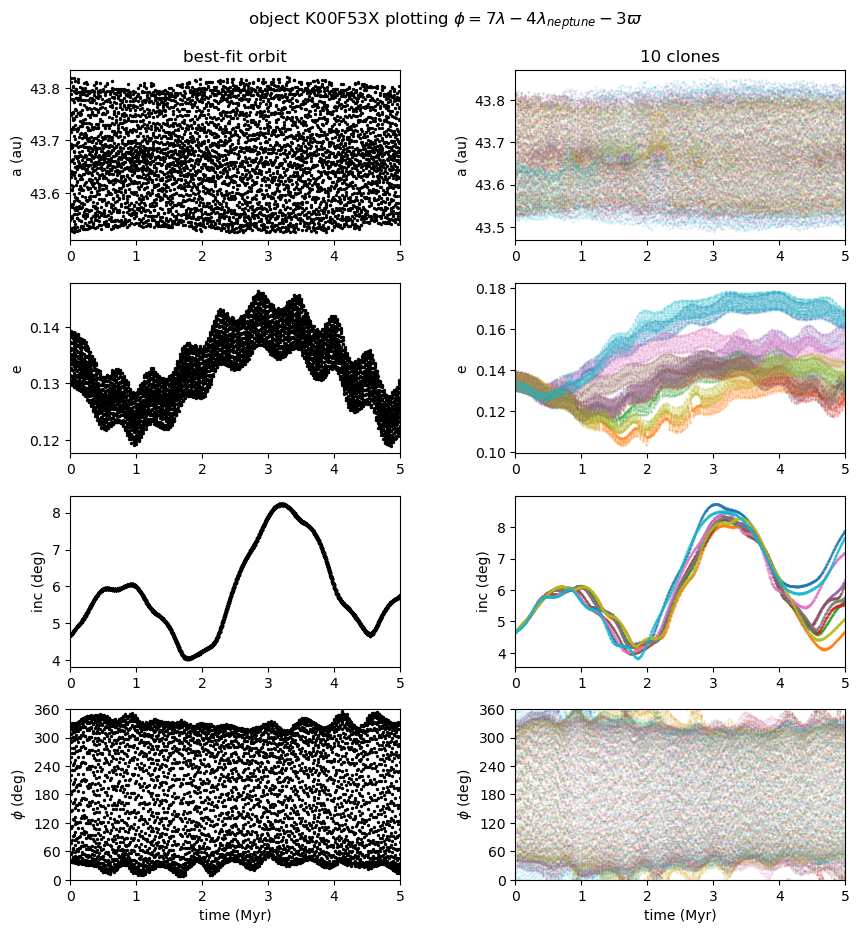

In [9]:
#Advanced options on that plotting call:
#you can make the point sizes bigger or smaller and the clones more or less transparent
#bfps controls the best-fit
#cps controls the clones
#calpha controls the clone transparency
flag = sbd.plot_resonance(sbody=sbody,
                          res_string=res_str,
                          a=a,e=e,inc=inc,phi=phi,t=t,
                          nclones=nclones,figfile=None,bfps=2.,cps=0.2,calpha=0.2)

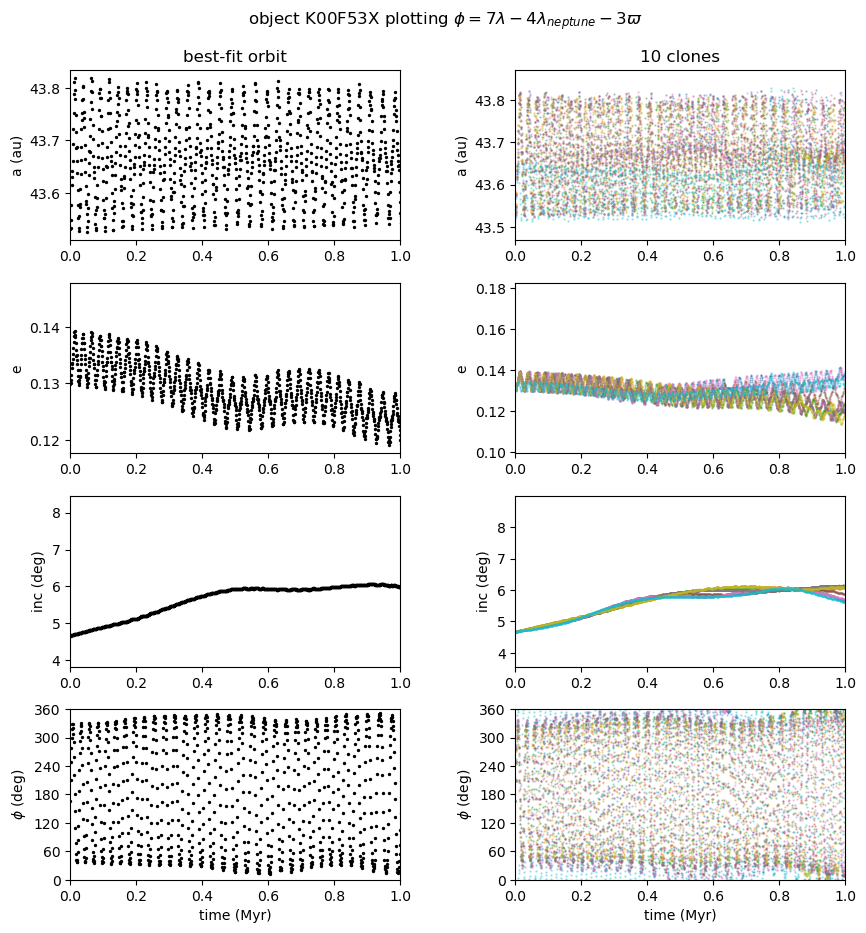

In [11]:
#More options:
#set the x-axis range:
tmin=0.
tmax=1e6
flag = sbd.plot_resonance(sbody=sbody,
                          res_string=res_str,
                          a=a,e=e,inc=inc,phi=phi,t=t,
                          nclones=nclones,figfile=None,bfps=2.,cps=0.4,calpha=0.4,
                          tmin=tmin,tmax=tmax)

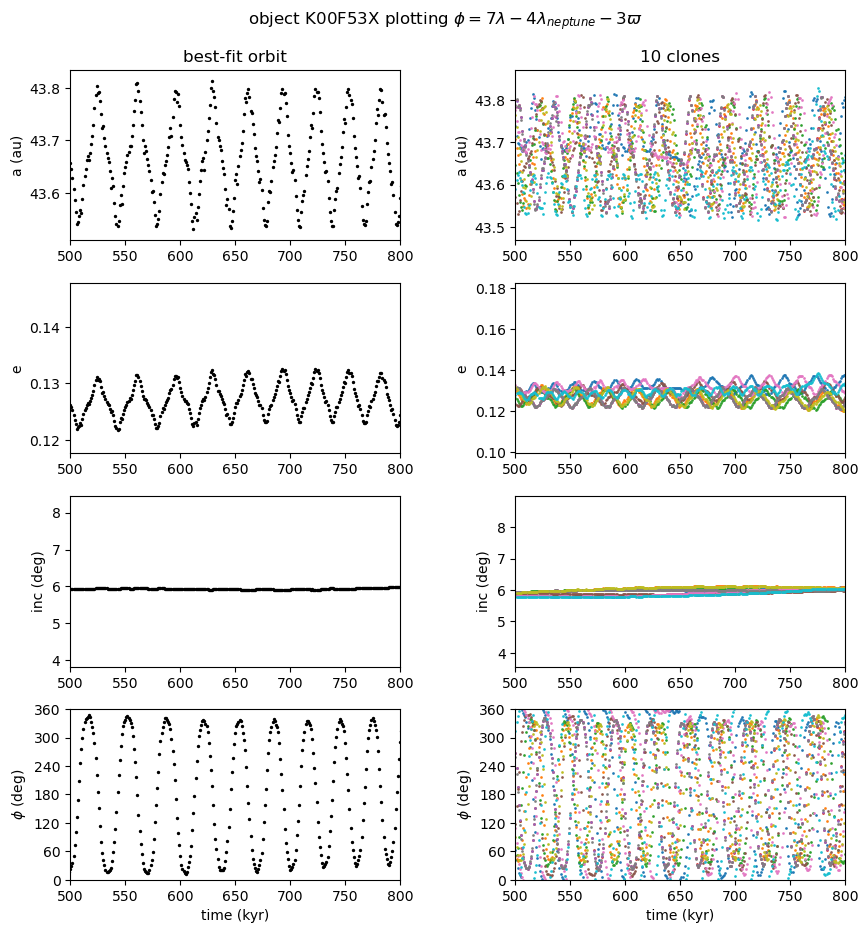

In [14]:
#zoom in even curther where the clones start diverging
tmin=0.5e6
tmax=0.8e6
flag = sbd.plot_resonance(sbody=sbody,
                          res_string=res_str,
                          a=a,e=e,inc=inc,phi=phi,t=t,
                          nclones=nclones,figfile=None,bfps=2.,cps=1,calpha=0.9,
                          tmin=tmin,tmax=tmax)